In [97]:
import sys
import numpy as np
import pandas as pd
import scipy
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import xgboost as xgb
import shap
import pickle

In [98]:
with open("CaseStudyFile/Data/Activity_6_01_data.pkl", "rb") as f:
    features_response, X_train_all, y_train_all, X_test_all, y_test_all = pickle.load(f)

In [99]:
from sklearn.model_selection import train_test_split
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_train_all, y_train_all, test_size = 0.2, random_state = 24)

In [100]:
xgb_model_4 = xgb.XGBClassifier(
    n_estimators=1000,
    max_depth=0,
    learning_rate=0.1,
    verbosity=1,
    objective='binary:logistic',
    use_label_encoder=False,
    n_jobs=-1,
    tree_method='hist',
    grow_policy='lossguide')

In [101]:
max_leaves_values = list(range(5,205,5))
print(max_leaves_values[:5])
print(max_leaves_values[-5:])

[5, 10, 15, 20, 25]
[180, 185, 190, 195, 200]


In [102]:
fit_params = {
    'verbose': False,
    'eval_set':[(X_train_2, y_train_2),(X_val_2, y_val_2)],
    
}
set_fit_params = {
    'eval_metric':'auc',
    'early_stopping_rounds':30
}

In [103]:
from sklearn.metrics import roc_auc_score as ras

In [104]:
%%time
val_aucs = []
for max_leaves in max_leaves_values:
    #Set parameter and fit model
    xgb_model_4.set_params(**{'max_leaves':max_leaves})
    xgb_model_4.set_params(**set_fit_params)
    xgb_model_4.fit(X_train_2, y_train_2, **fit_params)
    
    #Get validation score
    val_set_pred_proba = xgb_model_4.predict_proba(X_val_2)[:,1]
    val_aucs.append(ras(y_val_2, val_set_pred_proba))

c:\Users\HI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\HI\anaconda3\Lib\site-packages\xgboost\core

CPU times: total: 4min 34s
Wall time: 1min 47s


In [105]:
max_leaves_df_2 = pd.DataFrame({'Max leaves':max_leaves_values, 'Validation AUC':val_aucs})

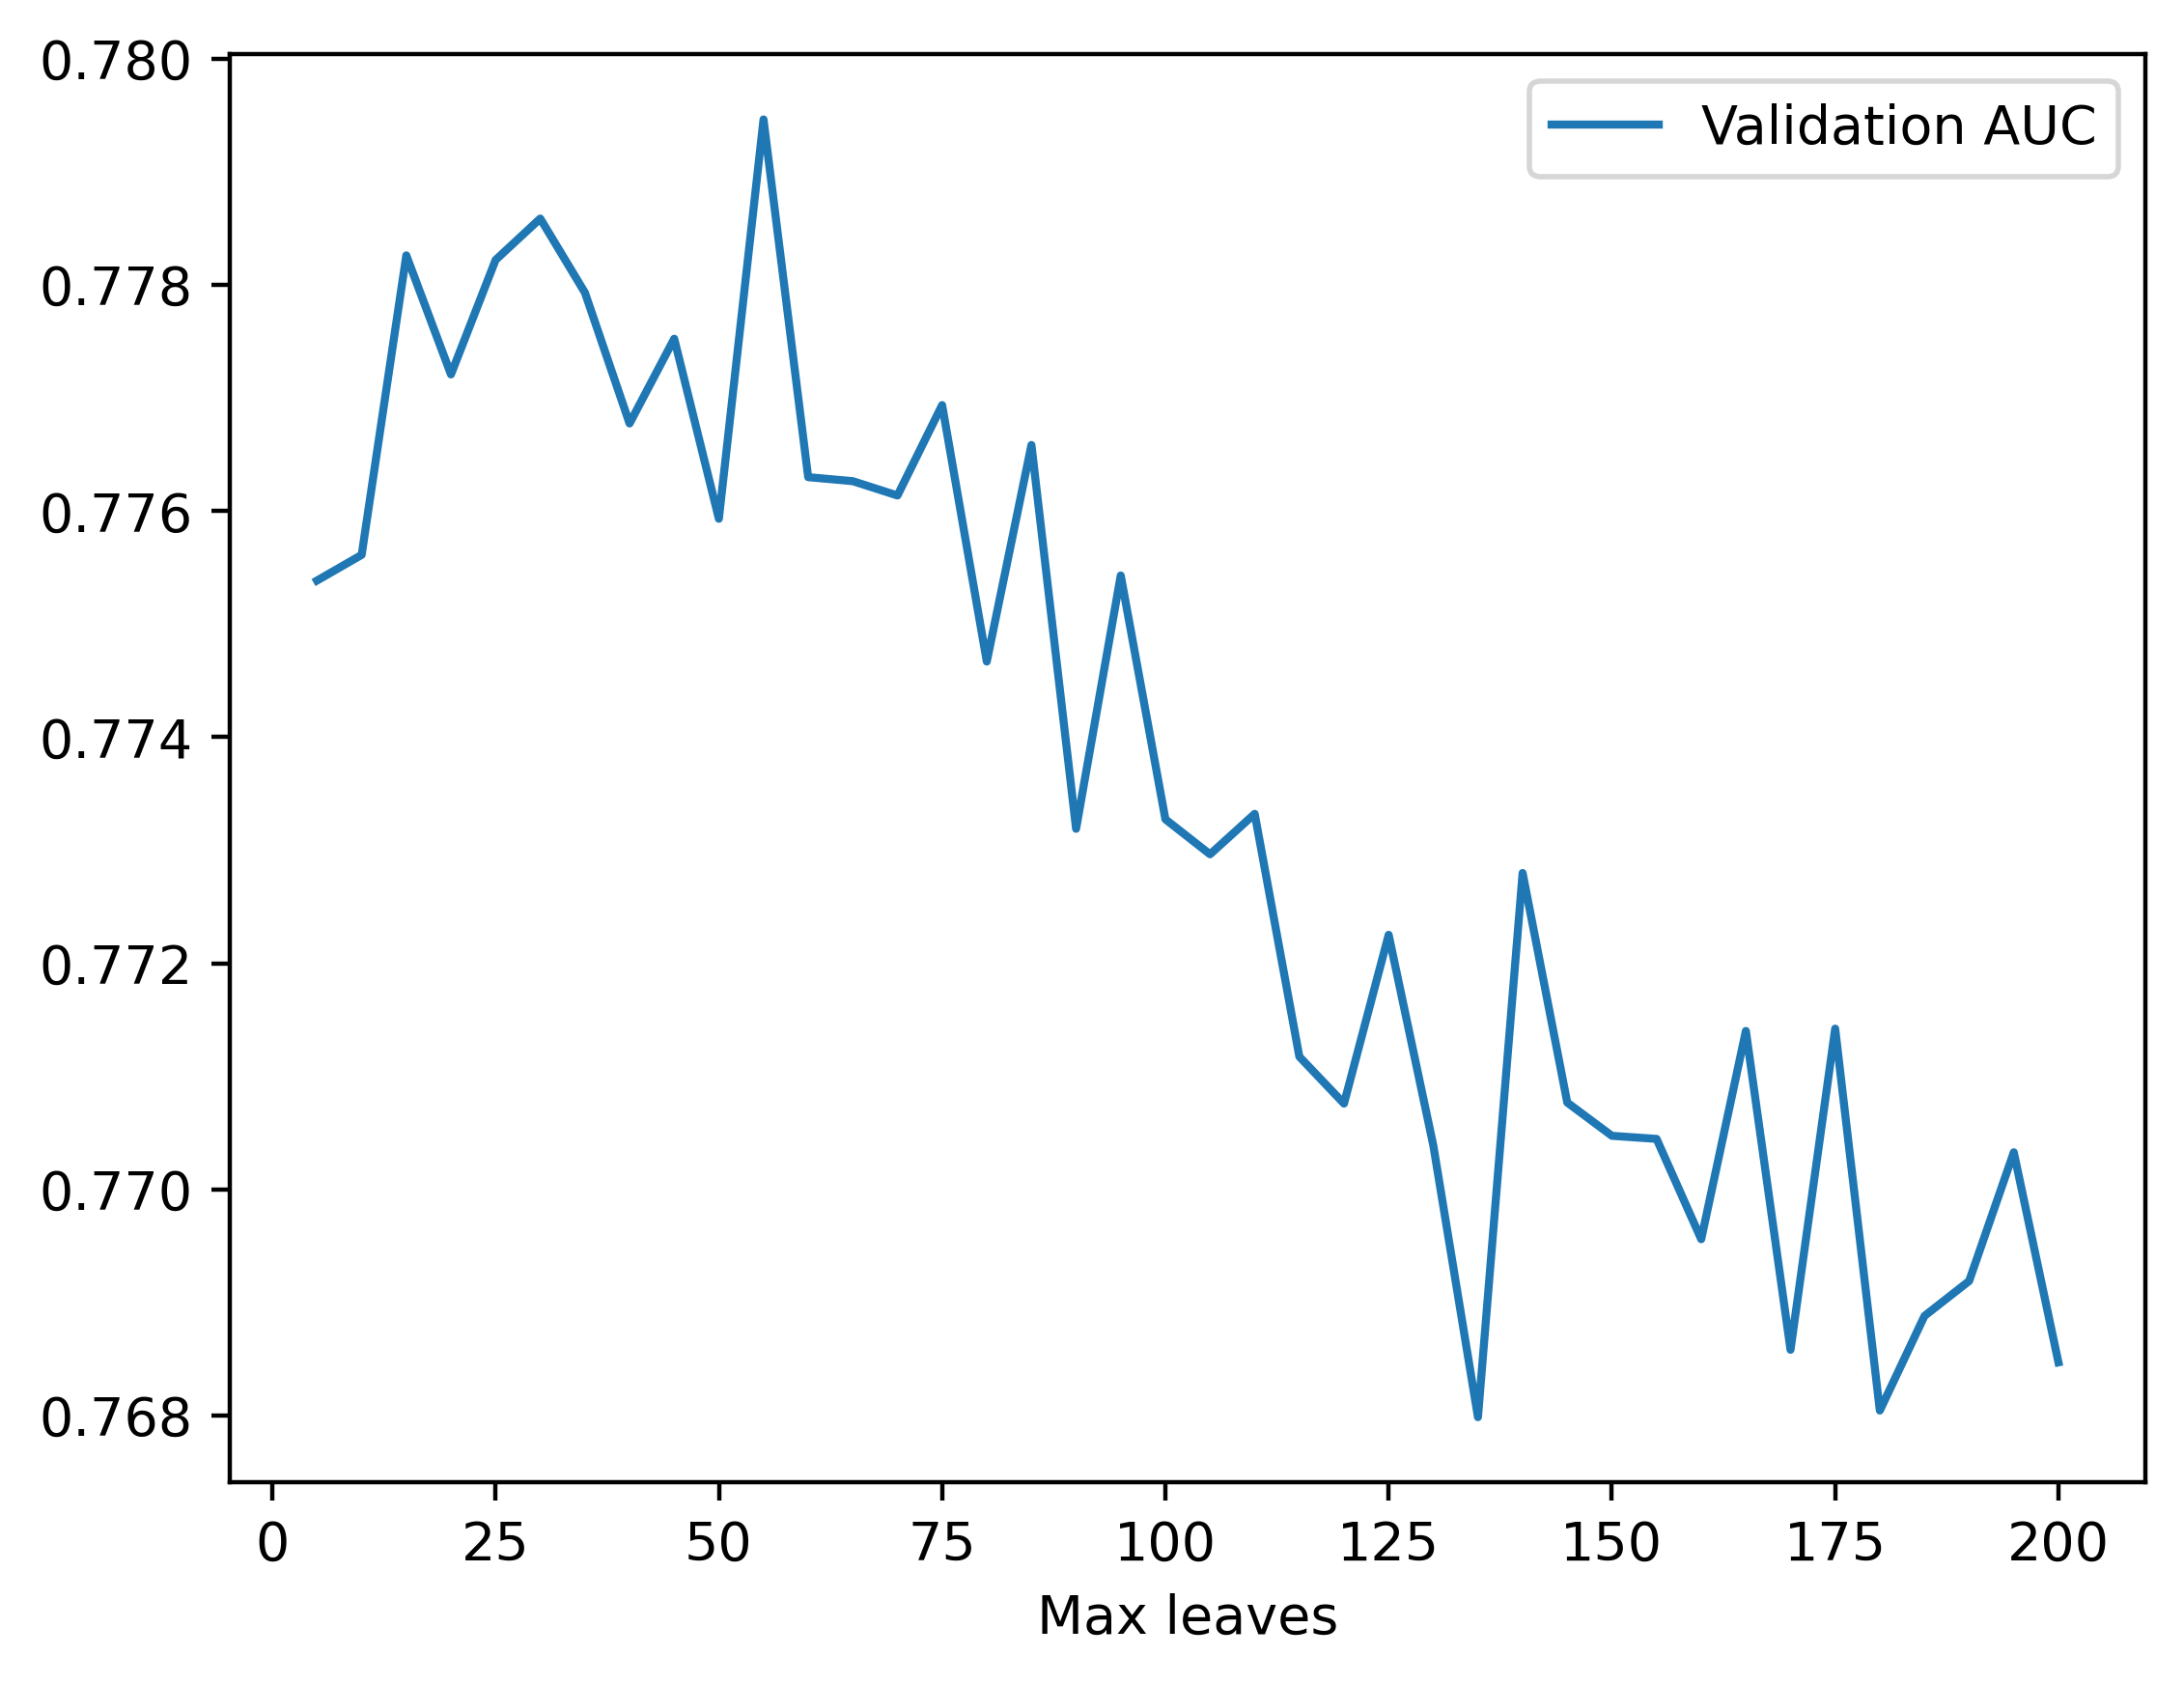

In [106]:
max_leaves_df_2.set_index("Max leaves").plot()
plt.show()

In [107]:
max_auc_2 = max_leaves_df_2['Validation AUC'].max()
max_auc_2
# 0.7785918508068121 (learning rate 0.1)
# 0.7783846497029288 (learning rate 0.05)

0.7794630134226972

In [108]:
max_ix = max_leaves_df_2['Validation AUC'] == max_auc_2
max_leaves_df_2[max_ix]

,Max leaves,Validation AUC
10,55,0.779463


In [109]:
%%time
xgb_model_4.set_params(**{'max_leaves':55})
xgb_model_4.set_params(**set_fit_params)
xgb_model_4.fit(X_train_2, y_train_2, **fit_params)

c:\Users\HI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:10:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


CPU times: total: 3.78 s
Wall time: 2.25 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=30,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=0, max_leaves=55,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [110]:
X_val_2

array([[5.000e+04, 2.000e+00, 1.000e+00, ..., 3.900e+02, 3.900e+02,
        3.900e+02],
       [4.000e+05, 1.000e+00, 2.000e+00, ..., 1.000e+03, 5.000e+02,
        1.000e+03],
       [2.000e+05, 2.000e+00, 2.000e+00, ..., 2.003e+03, 3.101e+03,
        5.300e+02],
       ...,
       [2.000e+04, 4.000e+00, 2.000e+00, ..., 1.000e+03, 0.000e+00,
        0.000e+00],
       [6.000e+04, 2.000e+00, 2.000e+00, ..., 6.000e+03, 2.100e+03,
        0.000e+00],
       [1.900e+05, 1.000e+00, 2.000e+00, ..., 5.000e+03, 6.000e+03,
        5.000e+03]])

In [111]:
X_val_2_df = pd.DataFrame(data =X_val_2, columns = features_response[:-1])

In [112]:
X_val_2_df.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,50000.0,2.0,1.0,39.0,-1.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0
1,400000.0,1.0,2.0,29.0,0.0,7191.0,8856.0,6181.0,7859.0,4899.0,1466.0,2000.0,1500.0,2000.0,1000.0,500.0,1000.0
2,200000.0,2.0,2.0,26.0,0.0,22737.0,12169.0,14328.0,16222.0,9915.0,11226.0,3000.0,6000.0,3000.0,2003.0,3101.0,530.0
3,280000.0,1.0,2.0,38.0,-1.0,17878.0,14011.0,30079.0,13139.0,13989.0,15559.0,2000.0,30000.0,14000.0,1000.0,16000.0,0.0
4,80000.0,3.0,1.0,65.0,0.0,80260.0,82116.0,80299.0,81416.0,81617.0,81607.0,3750.0,3520.0,3069.0,3271.0,3262.0,3237.0


In [113]:
# SHAP Summary
%time explainer_2 = shap.explainers.Tree(xgb_model_4, data = X_val_2_df)

CPU times: total: 141 ms
Wall time: 66 ms


In [114]:
%time shap_values_2 = explainer_2(X_val_2_df)

 94%|=================== | 4442/4750 [00:18<00:01]       

CPU times: total: 14.8 s
Wall time: 18.2 s


In [115]:
shap_values_2.values.shape

(4750, 17)

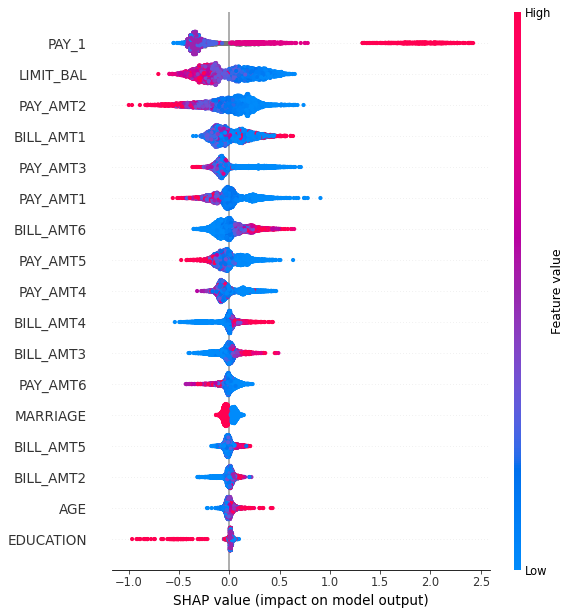

CPU times: total: 1.62 s
Wall time: 2.08 s


In [116]:
%%time
mpl.rcParams['figure.dpi'] = 75
shap.summary_plot(shap_values_2.values, X_val_2_df)

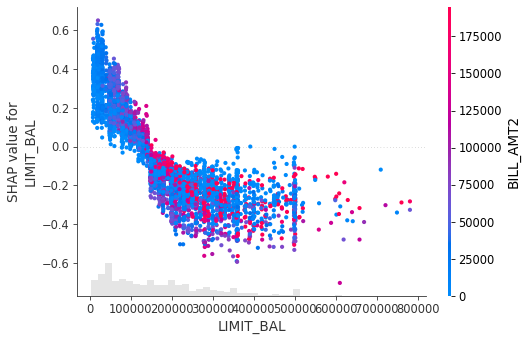

In [117]:
shap.plots.scatter(shap_values_2[:,'LIMIT_BAL'], color = shap_values_2)


In [129]:
with open("CaseStudyFile/Data/xgb_model_w_data.pkl", 'wb') as f:
    pickle.dump([features_response, 
                 X_train_all, y_train_all, 
                 X_test_all, y_test_all, xgb_model_4], f)


# Activity 6.01 Appendix
This shows how the samples with missing values for `PAY_1` were combined with the samples with non-missing values, using the same train/test split for the non-missing values as previous chapters.

In [ ]:
%pip install xlrd
df_orig = pd.read_excel(
    'CaseStudyFile/Data/default_of_credit_card_clients__courseware_version_1_21_19.xls')

  Using cached xlrd-2.0.1-py2.py3-none-any.whl.metadata (3.4 kB)
Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
Note: you may need to restart the kernel to use updated packages.


Repeat previous data cleaning steps: remove samples where all features and the response are zero

In [132]:
df_zero_mask = df_orig == 0
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)
# 315

315

In [ ]:
df_clean = df_orig.loc[~feature_zero_mask,:].copy()
print(df_clean.shape)
# (29685, 25)
print(df_clean['ID'].nunique())
# 29685

(29685, 25)
29685


Repeat previous data cleaning steps: adjust undocumented feature values

In [ ]:
#df_clean['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean.replace({'EDUCATION': 4}, inplace = True)
df_clean['EDUCATION'].value_counts()

EDUCATION
2    13884
1    10474
3     4867
4      460
Name: count, dtype: int64

In [140]:
df_clean.replace({'MARRAIGE': 3}, inplace = True)
df_clean['MARRIAGE'].value_counts()

MARRIAGE
2    15810
1    13503
3      318
0       54
Name: count, dtype: int64

Now instead of throwing away samples with missing data, we fill them with `np.nan` which XGBoost can work with. Start by making a separate dataframe with just these values.

In [141]:
missing_pay_1_mask = df_clean['PAY_1'] == 'Not available'
sum(missing_pay_1_mask)

3021

In [142]:
df_missing_pay_1 = df_clean.loc[missing_pay_1_mask,:].copy()
df_missing_pay_1.shape

(3021, 25)

In [146]:
df_missing_pay_1['PAY_1'].head(3)

17    Not available
28    Not available
29    Not available
Name: PAY_1, dtype: object

In [ ]:
df = pd.read_csv('CaseStudyFile/Data/Chapter_1_cleaned_data.csv')

In [122]:
features_response = df.columns.to_list()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                   'PAY_6', 'EDUCATION_CAT', 'graduate school',
                   'high school', 'none', 'others', 'university']

features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(df[features_response[:-1]].values, \
                        df['default payment next month'].values, test_size = 0.2, random_state = 24)

In [127]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 17)
(5333, 17)
(21331,)
(5333,)


In [148]:
df_missing_pay_1.shape

(3021, 25)

In [ ]:
#Copy the data frame with missing PAY_1 and assign imputed values
df_fill_pay_1_filled = df_missing_pay_1.copy()
df_fill_pay_1_filled['PAY_1'] = np.nan

#Split imputed data in to training and testing, using the same
#80/20 split we have used for the data with non-missing PAY_1
X_fill_pay_1_train, X_fill_pay_1_test,\
y_fill_pay_1_train, y_fill_pay_1_test = \
train_test_split(
    df_fill_pay_1_filled[features_response[:-1]],
    df_fill_pay_1_filled['default payment next month'],
test_size=0.2, random_state=24)

#Concatenate the imputed data with the array of non-missing data
X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)

X_test_all = np.concatenate((X_test, X_fill_pay_1_test), axis=0)
y_test_all = np.concatenate((y_test, y_fill_pay_1_test), axis=0)

In [150]:
with open('CaseStudyFile/Data/Activity_6_01_data.pkl', 'wb') as f:
    pickle.dump([features_response,
                X_train_all, y_train_all,
                 X_test_all, y_test_all], f)